In [1]:
import os
import tensorflow.keras as keras

os.environ["CUDA_VISIBLE_DEVICES"] = ""

import numpy as np
import cv2
import matplotlib.pyplot as plt

train, test = keras.datasets.cifar10.load_data()

In [2]:
x_train, y_train = train
x_test, y_test = test
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [3]:
x_train_histogram = []
x_test_histogram = []

for i in range(len(x_train)):
    chans = cv2.split(x_train[i])
    hist_feature = []
    
    for chan in chans:
        hist = cv2.calcHist([chan], [0], None, [16], [0, 256])
        hist_feature.extend(hist.flatten())
        
    x_train_histogram.append(hist_feature)

for i in range(len(x_test)):
    chans = cv2.split(x_test[i])
    hist_feature = []
    
    for chan in chans:
        hist = cv2.calcHist([chan], [0], None, [16], [0, 256])
        hist_feature.extend(hist.flatten())
        
    x_test_histogram.append(hist_feature)

x_train_histogram = np.array(x_train_histogram)
x_test_histogram = np.array(x_test_histogram)

In [4]:
# SZ=20
bin_n = 16 # Number of bins

def hog(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    mag, ang = cv2.cartToPolar(gx, gy)
    bins = np.int32(bin_n*ang/(2*np.pi))    # quantizing binvalues in (0...16)
    bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
    mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)     # hist is a 64 bit vector
    return hist.astype(np.float32)

x_train_hog = np.array([hog(x) for x in x_train])
x_test_hog = np.array([hog(x) for x in x_test])

In [5]:
SVM_hist = cv2.ml.SVM_create()
SVM_hist.setKernel(cv2.ml.SVM_LINEAR)
SVM_hist.setGamma(5.383)
SVM_hist.setType(cv2.ml.SVM_C_SVC)
SVM_hist.setC(2.67)

#training
SVM_hist.train(x_train_histogram, cv2.ml.ROW_SAMPLE, y_train)

# prediction
_, y_hist_train = SVM_hist.predict(x_train_histogram)
_, y_hist_test = SVM_hist.predict(x_test_histogram)

In [6]:
SVM_hog = cv2.ml.SVM_create()
SVM_hog.setKernel(cv2.ml.SVM_LINEAR)
SVM_hog.setGamma(5.383)
SVM_hog.setType(cv2.ml.SVM_C_SVC)
SVM_hog.setC(2.67)

#training
SVM_hog.train(x_train_hog, cv2.ml.ROW_SAMPLE, y_train)

# prediction
_, y_hog_train = SVM_hog.predict(x_train_hog)
_, y_hog_test = SVM_hog.predict(x_test_hog)

In [ ]:
# color histogram

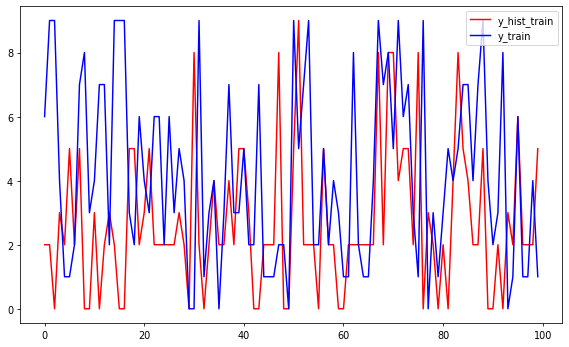

In [7]:
plt.figure(figsize=(10, 6), dpi=70)
plt.plot(y_hist_train[:100], color='red', label='y_hist_train')
plt.plot(y_train[:100], color='blue', label='y_train')
plt.legend(loc='upper right')
plt.show()

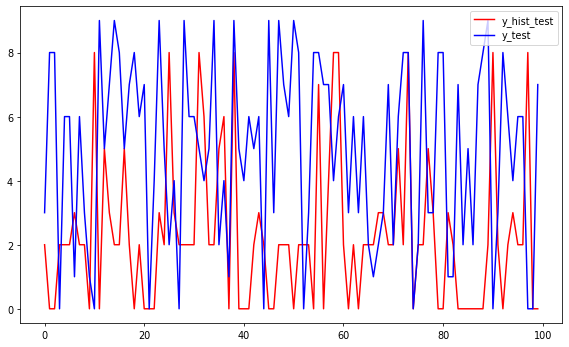

In [8]:
plt.figure(figsize=(10, 6), dpi=70)
plt.plot(y_hist_test[:100], color='red', label='y_hist_test')
plt.plot(y_test[:100], color='blue', label='y_test')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# HOG

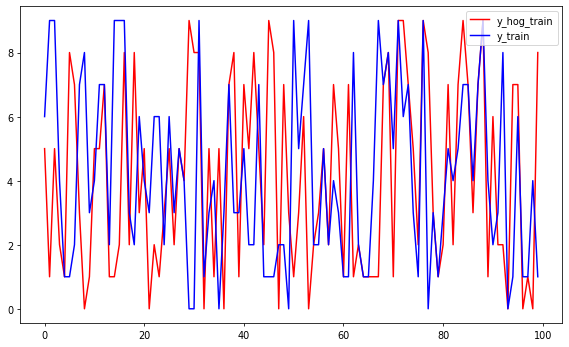

In [9]:
plt.figure(figsize=(10, 6), dpi=70)
plt.plot(y_hog_train[:100], color='red', label='y_hog_train')
plt.plot(y_train[:100], color='blue', label='y_train')
plt.legend(loc='upper right')
plt.show()

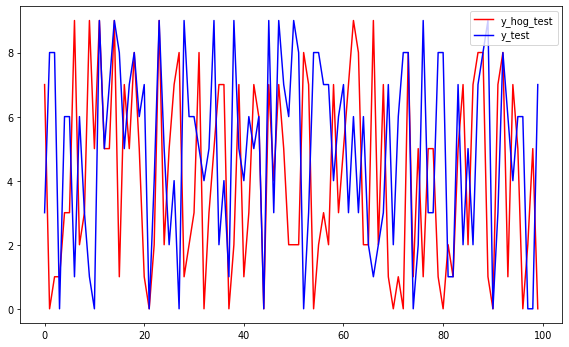

In [10]:
plt.figure(figsize=(10, 6), dpi=70)
plt.plot(y_hog_test[:100], color='red', label='y_hog_test')
plt.plot(y_test[:100], color='blue', label='y_test')
plt.legend(loc='upper right')
plt.show()